Problem size Test

In [ ]:
import matplotlib.pyplot as plt
import os

# Create a directory to store figures
os.makedirs("figures", exist_ok=True)

# Counter for unique filenames
fig_counter = 0

def my_show(*args, **kwargs):
    global fig_counter
    # Create a filename based on the counter
    filename = os.path.join("figures", f"figure_{fig_counter}.png")
    plt.savefig(filename, bbox_inches="tight")
    plt.close()  # Optionally close the figure after saving
    print(f"Figure saved as {filename}")
    fig_counter += 1

# Override plt.show with our custom function
plt.show = my_show

In [ ]:
import simtool.simtool as simtool

L_values = [8192,6144,4096,3072,2048, 1536, 1024, 768, 512, 384, 256, 128]

df_results = simtool.problem_size_test(L_values, presets=['base','rb_update_boltzmann', 'intrinsics' ])
print(df_results)

df_results.to_csv('problem_size_test.csv')



Building preset 'base' for L=512 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/base_512_5 ...
Building preset 'base' for L=384 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/base_384_5 ...
Building preset 'base' for L=256 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/base_256_5 ...
Building preset 'base' for L=128 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/base_128_5 ...
Building preset 'rb_update_boltzmann' for L=512 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/rb_update_boltzmann_512_5 ...
Building preset 'rb_update_boltzmann' for L=256 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/rb_update_boltzmann_256_5 ...
Building preset 'rb_update_boltzmann' for L=384 in directory /home/lfissore/Documents/Facultad/paralela2025/tiny_ising/out/rb_update_boltzmann_384_5 ...
Building preset 'rb_update_boltzmann' for L=128 i

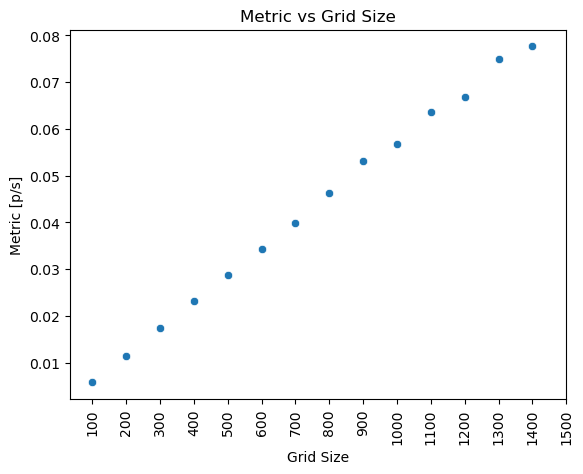

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('problem_size_test_atom_metric.csv')

# Use seaborn to create a line plot
sns.scatterplot(x='L', y='metric', data=df)

# Set the plot title and axis labels
plt.title('Metric vs Grid Size')
plt.xlabel('Grid Size')
plt.ylabel('Metric [p/s]')
plt.xticks(df.L.unique(), rotation=90)

# Show the plot
plt.show()

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

def scale(arr):
    return np.divide(arr,L*L)

# note the double square brackets around the 'x'!!
# this is because we want to use DataFrame.apply,
# not Series.apply!!
df_metric = df_results
df_metric['metric'] = df[['metric']].apply(scale)


# Use seaborn to create a line plot
sns.scatterplot(x='L', y='metric', data=df_results)

# Set the plot title and axis labels
plt.title('Metric vs Grid Size')
plt.xlabel('Grid Size')
plt.ylabel('Time')
plt.xticks(df_results.L.unique(), rotation=90)

# Show the plot
plt.show()

NameError: name 'L' is not defined

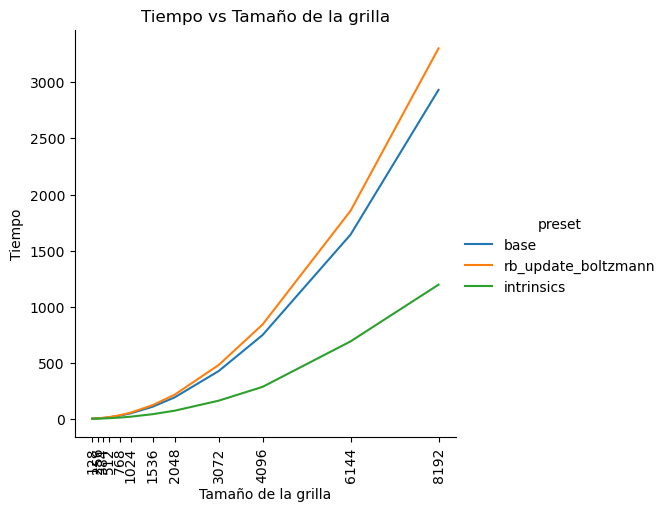

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('problem_size_test_lab2_atom.csv')
df['host'] = 'atom'

df2 = pd.read_csv('problem_size_test_lab2_jupiterace.csv')
df['host'] = 'jupiterace'

df = pd.concat([df, df2])
# Use seaborn to create a line plot
sns.relplot(x='L', y='metric', data=df,kind="line", hue='preset', col='host')


# Set the plot title and axis labels
plt.title('Tiempo vs Tamaño de la grilla')
plt.xlabel('Tamaño de la grilla')
plt.ylabel('Tiempo')
# plt.xticks(df.L.unique(), rotation=90)

# Show the plot
plt.show()